# Importing all the Necessary Library..¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\MG\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


There are some issue looking in a columns its show I think Key column will be in the first Columns inplace of Unnmaed columns.And i think there is two pick up date columns as well.

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.rename(columns={'Unnamed: 0':'Keys'},inplace=True) 
# Here we are replacing the 'unnamed column' to 'keys' as it is redundant column 

In [7]:
df.drop(['key'] , inplace = True , axis=1) # Dropping the 'key' column as well .


In [8]:
df.isnull().sum() # We found there are only 2 null values .

Keys                 0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
def is_title(col) :
  return col.title()


df.columns = df.columns.map(is_title)

In [10]:
df['Pickup_Datetime'] = pd.to_datetime(df['Pickup_Datetime'])

In [11]:
df.dropna(inplace=True)

In [12]:
df.columns

Index(['Keys', 'Fare_Amount', 'Pickup_Datetime', 'Pickup_Longitude',
       'Pickup_Latitude', 'Dropoff_Longitude', 'Dropoff_Latitude',
       'Passenger_Count'],
      dtype='object')

In [13]:
df['Year']  = df['Pickup_Datetime'].dt.year
df['Month'] = df['Pickup_Datetime'].dt.month_name()
df['Hour']  = df['Pickup_Datetime'].dt.hour
df['Day'] = df['Pickup_Datetime'].dt.day_name()

In [14]:
df['Hour'] = df['Hour'].replace(0,24)

In [15]:
def time_zone(col):
    i = col
    if i >= 7 and i < 12:
      return "Morning"
    elif i >= 12 and i < 17:
      return "Afternoon"
    elif i >= 17 and i < 22:
      return "Evening"
    else :
      return "Night"

df['Time_Zone'] = df.Hour.map(time_zone)

The code defines a function called haversin that calculates the distance between two geographical points on the Earth's surface given their latitude and longitude using the Haversine formula. Here’s a breakdown of what the code does:

Function Definition: The function haversin takes four parameters: lat1, lon1, lat2, and lon2, which represent the latitude and longitude of two points (Point 1 and Point 2).

Radius of the Earth: The variable R is set to 6373.0, which is the approximate radius of the Earth in kilometers.

Converting Degrees to Radians: The latitudes and longitudes provided in degrees are converted to radians using np.radians(). This is necessary because trigonometric functions in Python (from the NumPy library) expect input in radians.

Calculating Differences: The differences in latitude (dlat) and longitude (dlon) between the two points are calculated.

Haversine Formula:

The formula calculates the square of half the chord length between the points:

In [16]:
def haversin(lat1,lon1,lat2,lon2):
    R = 6373.0  # Radians Values..

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

df['Distance_Km']=haversin(df['Pickup_Latitude'],df['Pickup_Longitude'],df['Dropoff_Latitude'],df['Dropoff_Longitude'])

In [17]:
print(f'Duplicated Values are {df.duplicated().sum()}')  # Looking uponj that there are no duplicates value in the dataset 
df.head()

Duplicated Values are 0


,Keys,Fare_Amount,Pickup_Datetime,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Passenger_Count,Year,Month,Hour,Day,Time_Zone,Distance_Km
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,May,19,Thursday,Evening,1.683851
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,July,20,Friday,Evening,2.458361
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,August,21,Monday,Evening,5.037958
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,June,8,Friday,Morning,1.662205
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,August,17,Thursday,Evening,4.476855


In [18]:
df[['Fare_Amount' , 'Passenger_Count' , 'Year' , 'Hour' , 'Distance_Km']].describe()

,Fare_Amount,Passenger_Count,Year,Hour,Distance_Km
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,1.684543,2011.742434,14.432672,20.861897
std,9.901760,1.385995,1.856400,6.225603,383.084863
min,-52.000000,0.000000,2009.000000,1.000000,0.000000
25%,6.000000,1.000000,2010.000000,10.000000,1.215603
50%,8.500000,1.000000,2012.000000,15.000000,2.121658
75%,12.500000,2.000000,2013.000000,20.000000,3.876386
max,499.000000,208.000000,2015.000000,24.000000,16414.390364


We check that there is '0' value in our target column , which is not logically understandable . So we are storing the values which are not equal to '0' to the 'df'

In [19]:
df = df[df['Distance_Km'] != 0]

In [20]:
df[df['Distance_Km']==0]

,Keys,Fare_Amount,Pickup_Datetime,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Passenger_Count,Year,Month,Hour,Day,Time_Zone,Distance_Km


In [21]:
df.describe()

,Keys,Fare_Amount,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Passenger_Count,Year,Hour,Distance_Km
count,1.943670e+05,194367.000000,194367.000000,194367.000000,194367.000000,194367.000000,194367.000000,194367.000000,194367.000000,194367.000000
mean,2.770608e+07,11.353360,-73.853162,40.665386,-73.850755,40.653048,1.684885,2011.747287,14.431843,21.466393
std,1.600790e+07,9.753327,5.964735,5.588198,8.833022,4.173640,1.388402,1.860104,6.224938,388.578716
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,0.000084
25%,1.382723e+07,6.000000,-73.992271,40.736347,-73.991591,40.735213,1.000000,2010.000000,10.000000,1.282146
50%,2.773069e+07,8.500000,-73.982115,40.753250,-73.980538,40.753705,1.000000,2012.000000,15.000000,2.185042
75%,4.153670e+07,12.500000,-73.968392,40.767507,-73.965408,40.768312,2.000000,2013.000000,20.000000,3.961412
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2015.000000,24.000000,16414.390364


In [22]:
# Seeing the Latitude and Longitude COlumns as well..which contain 0 values..
df = df[(df['Pickup_Latitude'] != 0) & (df['Pickup_Longitude'] != 0) & (df['Dropoff_Latitude'] != 0) & (df['Dropoff_Longitude'] != 0)]

# Remove all the Value that are Containing 0 in their Latitude and Longitude Columns as well..

In [23]:
# See the OverView of the Top Values
df = df[df['Passenger_Count'] != 0]
df["Passenger_Count"].value_counts()

Passenger_Count
1      134212
2       28579
5       13569
3        8633
6        4159
4        4148
208         1
Name: count, dtype: int64

In [24]:
# There is one person or row that contain Passenger_Count = 208 so we simply remove that row because its wrong data..
# Before removing DataSet Size => (193301, 14)
df = df[df['Passenger_Count'] != 208]

In [25]:
df.drop('Pickup_Datetime', inplace=True, axis = 1) # Now we can drop this column because we have extracted and use this column for the feature selection

# Starting EDA [Exploratory Data Analysis]


### Uni-Variate Analysis

Text(0, 0.5, 'Count')

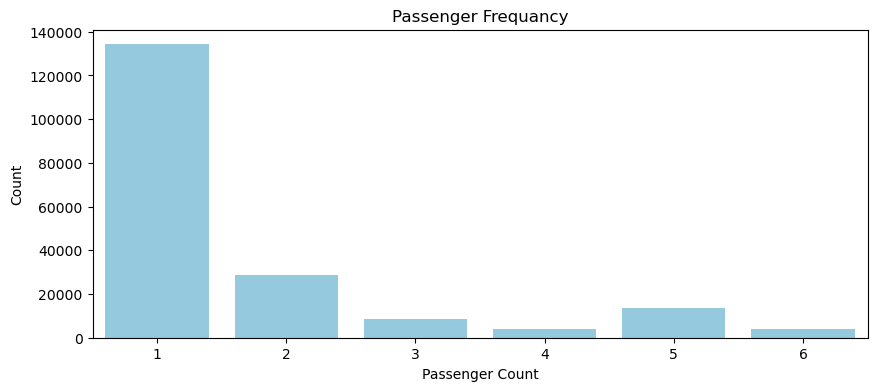

In [26]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df['Passenger_Count'] , data = df , color='skyblue')
plt.title('Passenger Frequancy')
plt.xlabel('Passenger Count')
plt.ylabel('Count')


We can see many people travel solo .

Text(0, 0.5, 'Count')

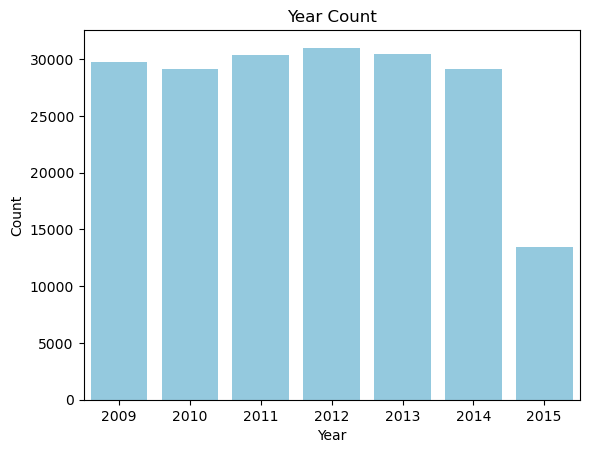

In [27]:
# See the Order Counts in a Year in a Month or in a Hour as well one by one..
ax = sns.countplot(x = df['Year'] , data = df,color='skyblue')
plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')


By this we came to know that there are only 50% data of the year 2015 as compared to the other year !

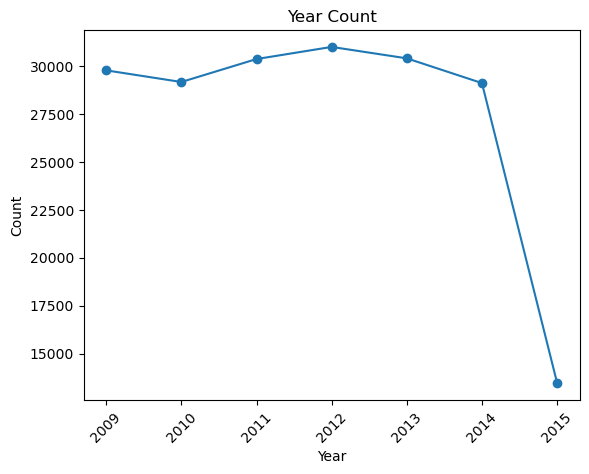

In [28]:
year_counts = df['Year'].value_counts().sort_index()  
plt.plot(year_counts.index, year_counts.values, marker='o')  
plt.title('Year Count')  
plt.xlabel('Year')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show() 

Text(0, 0.5, 'Count')

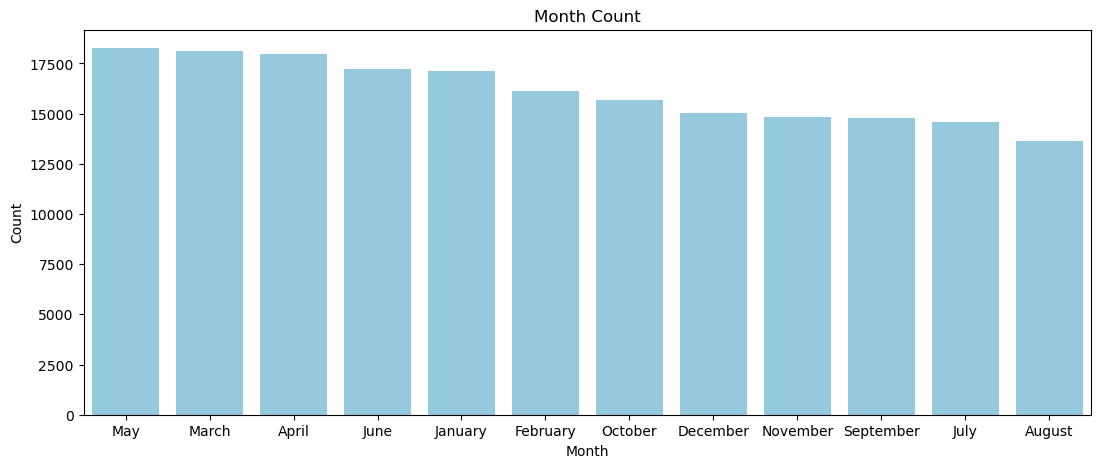

In [29]:
# See the Frequency of Order in Each Month..
plt.figure(figsize=(13,5))
ax = sns.countplot(x = df['Month'] , data = df , order=df['Month'].value_counts().index , color='skyblue')
plt.title('Month Count')
plt.xlabel('Month')
plt.ylabel('Count')


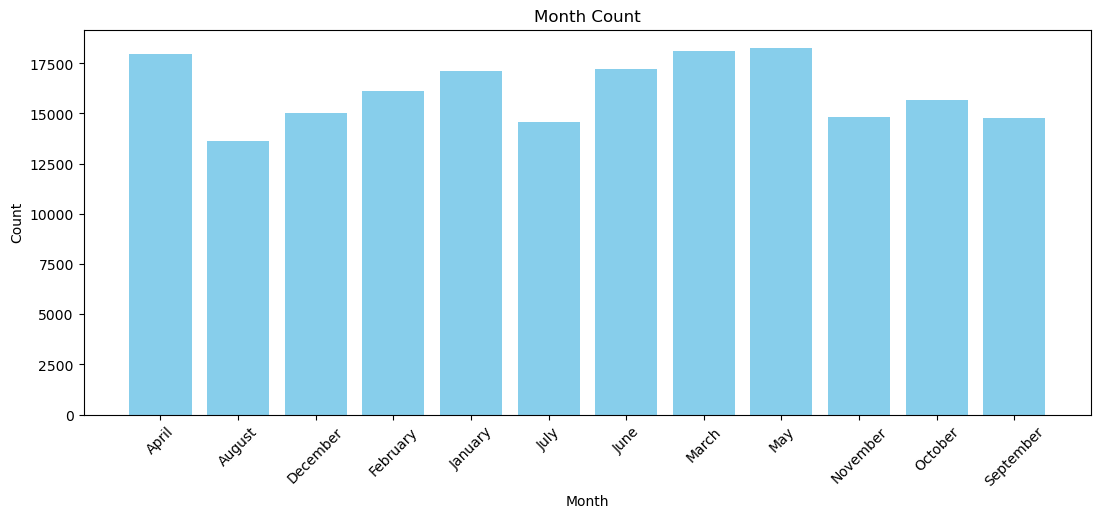

In [30]:
# Assuming df is your DataFrame with a 'Month' column  
month_counts = df['Month'].value_counts().sort_index()  

plt.figure(figsize=(13, 5))  
plt.bar(month_counts.index, month_counts.values, color='skyblue')  
plt.title('Month Count')  
plt.xlabel('Month')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show() 

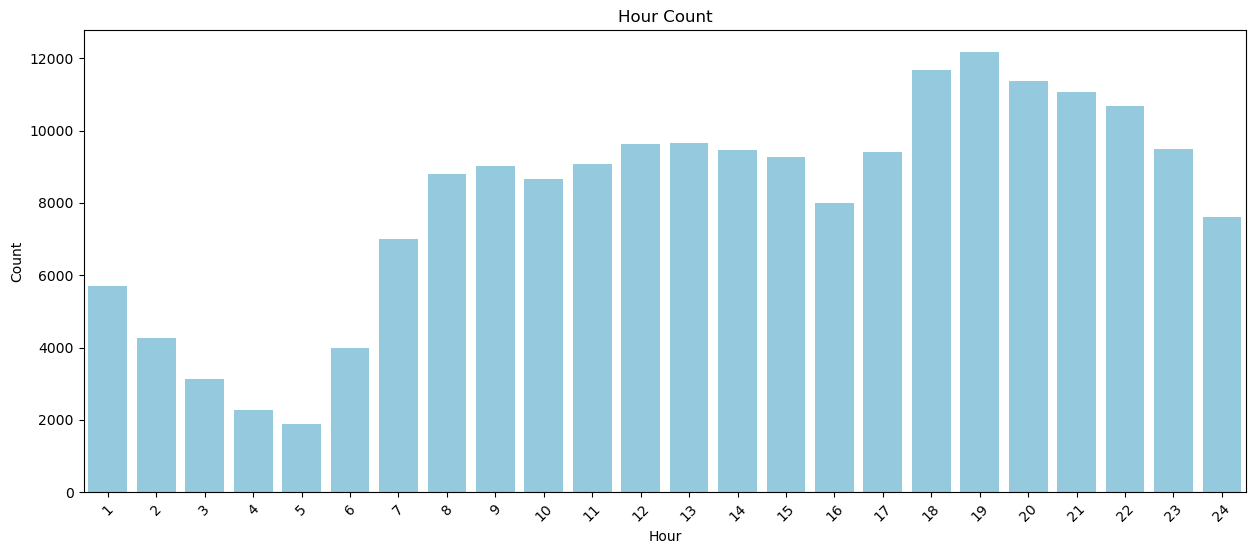

In [31]:
plt.figure(figsize=(15, 6))  
ax = sns.countplot(x='Hour', data=df , color='skyblue')  
plt.title('Hour Count')  
plt.xlabel('Hour')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability  
plt.show()

There are three patch according to me in which time we get the most number of order first patch time was [18,19,20,21,22] and second batch was [13,12,23,14,17,15,11,9] and third batch was [8,10,16,24,7] and remaining time we get the order but not as much..

Text(0, 0.5, 'Count')

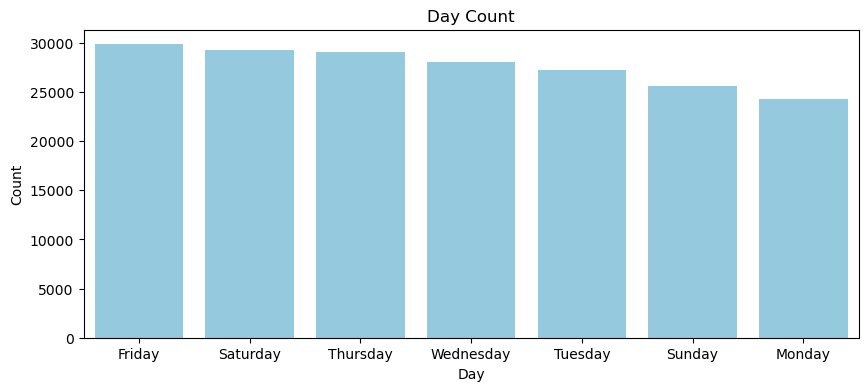

In [32]:
# See the Day Wise Numbers of Orders.
plt.figure(figsize = (10,4))
ax = sns.countplot(x = df['Day'] , data = df,order = df['Day'].value_counts().index, color='skyblue')
plt.title('Day Count')
plt.xlabel('Day')
plt.ylabel('Count')


There is not much change on weekend as compared to weekday,there is just a slight diffrence in it .

Text(0, 0.5, 'Count')

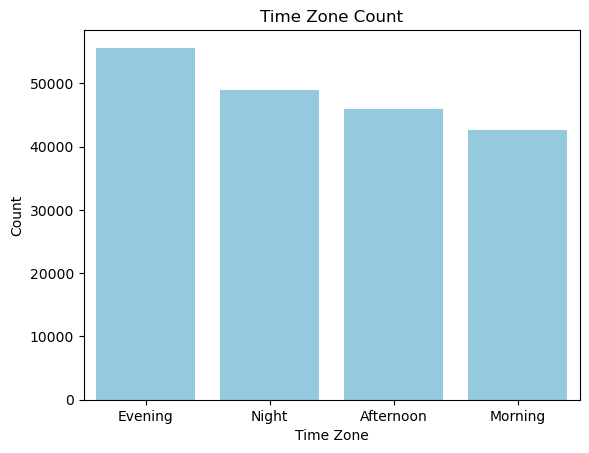

In [33]:
# See the Time Wise Order Frequnecy ..
ax = sns.countplot(x = df['Time_Zone'] , data = df , order = df['Time_Zone'].value_counts().index , color='skyblue')
plt.title('Time Zone Count')
plt.xlabel('Time Zone')
plt.ylabel('Count')

By this we can estimate that evening is the rush timing for the people as it is the combination of the office , casual outing and other people . So in the slot of the evening there should be more availablity of the vehichle .

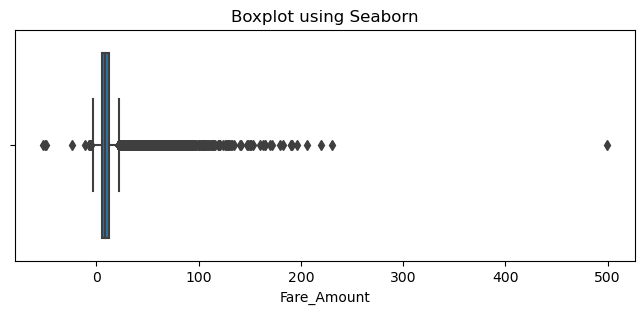

In [34]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Fare_Amount', data=df)
plt.title('Boxplot using Seaborn')
plt.show()

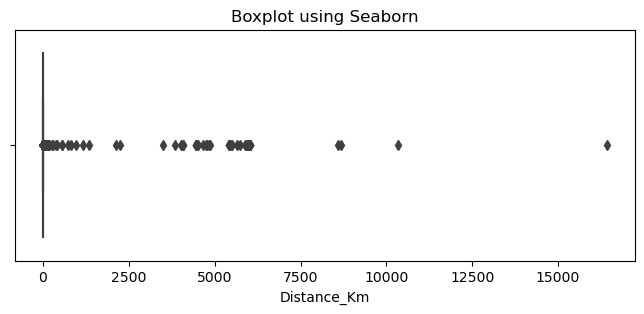

In [35]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Distance_Km', data=df)
plt.title('Boxplot using Seaborn')
plt.show()

We come to know that there are many outliers in th distance km and fare price column . We should treat them .

In [36]:
lower_percentile = 1
upper_percentile = 99

# Calculate the lower and upper bounds
lower_bound_distance = df['Distance_Km'].quantile(lower_percentile / 100)
upper_bound_distance = df['Distance_Km'].quantile(upper_percentile / 100)

lower_bound_fare = df['Fare_Amount'].quantile(lower_percentile / 100)
upper_bound_fare = df['Fare_Amount'].quantile(upper_percentile / 100)

# Apply capping using clip
df['Distance_Km'] = df['Distance_Km'].clip(lower=lower_bound_distance, upper=upper_bound_distance)
df['Fare_Amount'] = df['Fare_Amount'].clip(lower=lower_bound_fare, upper=upper_bound_fare)


This code snippet calculates the lower and upper bounds for two DataFrame columns ('Distance_Km' and 'Fare_Amount') based on specified lower and upper percentiles (1% and 99%). It then uses these bounds to cap the values in each column. The quantile method is used to find the values corresponding to the specified percentiles, and clip is applied to ensure that all values in the columns fall within the calculated bounds, effectively limiting any outliers.

In [37]:
df[['Fare_Amount' , 'Passenger_Count' , 'Year' , 'Hour' , 'Distance_Km']].describe()

,Fare_Amount,Passenger_Count,Year,Hour,Distance_Km
count,193300.000000,193300.000000,193300.000000,193300.000000,193300.000000
mean,11.241444,1.689912,2011.746425,14.432747,3.349566
std,8.943789,1.305639,1.862676,6.225739,3.538159
min,3.300000,1.000000,2009.000000,1.000000,0.223572
25%,6.000000,1.000000,2010.000000,10.000000,1.280820
50%,8.500000,1.000000,2012.000000,15.000000,2.181990
75%,12.500000,2.000000,2013.000000,20.000000,3.944813
max,52.040400,6.000000,2015.000000,24.000000,20.462865
